**A2: Machine learning with python**
          (Team 5, MBAN2)


**Authors**: Ganga Singh,
             Sumaiya Abdullahi,
             Awale Abdi,
             Ilora Bandyopadhyay,
             Alice Destrait,
             Celine Della Corte

**About the dataset:**
The dataset contains 10,000 entries related to rental Apartments and 22 columns. Despite the presence of missing values across various columns, the dataset has been meticulously cleaned to ensure that the 'price' and 'square_feet' columns are always populated, preserving its original integrity. This approach maintains the dataset's utility for analysis and modeling, ensuring critical information for rental pricing predictions remains intact.

**Objective** to leverage comprehensive market data to accurately predict apartment selling prices, setting a new standard in real estate transactions.

In [ ]:
#import the libraries
import pandas as pd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
#import the dataset
apartment_df = pd.read_csv('/content/apartments_for_rent_classified_10K-3.csv', sep=";", encoding='cp1252')

In [ ]:
apartment_df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [ ]:
apartment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [ ]:
# Shape of dataset
apartment_df.shape

(10000, 22)

**Missing Values**

checking the missing values

In [ ]:
# checking How many null values we have per column
apartment_df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

**Keeping only the desired columns**

In [ ]:
# Define the desired columns we want to keep
columns_to_keep = ['bathrooms', 'bedrooms', 'square_feet', 'cityname', 'price']

# Create a new DataFrame with only the selected columns using the .loc method
apartment_df = apartment_df.loc[:, columns_to_keep]

# Display the first few rows of the new DataFrame
apartment_df.head()


,bathrooms,bedrooms,square_feet,cityname,price
0,NaN,0.0,101,Washington,790
1,NaN,1.0,106,Evansville,425
2,1.0,0.0,107,Arlington,1390
3,1.0,0.0,116,Seattle,925
4,NaN,0.0,125,Arlington,880


In [ ]:
apartment_df.isnull().sum()

bathrooms      34
bedrooms        7
square_feet     0
cityname       77
price           0
dtype: int64

In [ ]:
#drop the missing values
apartment_df = apartment_df.dropna()

In [ ]:
apartment_df.isnull().sum()

bathrooms      0
bedrooms       0
square_feet    0
cityname       0
price          0
dtype: int64

In [ ]:
apartment_df.describe()

,bathrooms,bedrooms,square_feet,price
count,9883.000000,9883.000000,9883.000000,9883.000000
mean,1.380552,1.747040,943.237580,1486.954670
std,0.616038,0.941714,527.162123,1078.622808
min,1.000000,0.000000,107.000000,200.000000
25%,1.000000,1.000000,650.000000,949.000000
50%,1.000000,2.000000,803.000000,1275.000000
75%,2.000000,2.000000,1100.000000,1695.000000
max,8.500000,9.000000,11318.000000,52500.000000


In [ ]:
# Get unique values of the 'cityname' column
unique_cities = pd.unique(apartment_df['cityname'])

# Display the unique city names
print(unique_cities)

['Arlington' 'Seattle' 'Manhattan' ... 'Saint Leonard' 'Chaska'
 'Bella Vista']


In [ ]:
# Remove leading and trailing spaces from 'cityname'
apartment_df['cityname'] = apartment_df['cityname'].str.strip()

# Get the count of each unique 'cityname' and sort them in ascending order
location_freq = apartment_df.groupby('cityname').size().sort_values(ascending=False)

# Display
location_freq


cityname
Austin         522
Dallas         215
Houston        186
San Antonio    182
Los Angeles    165
              ... 
Del Mar          1
Pennsauken       1
Leon Valley      1
Buckeye          1
Penns Grove      1
Length: 1572, dtype: int64

In [ ]:
# Count the number of locations with frequency less than or equal to 10
location_count = (location_freq <= 10).sum()

# Display the count
location_count

1395

In [ ]:
# Filter locations with frequency less than or equal to 10
low_freq_locations = location_freq[location_freq <= 10]

# Display the filtered location frequencies
low_freq_locations

cityname
Cambridge      10
Shreveport     10
Flanders       10
Memphis        10
Sacramento     10
               ..
Del Mar         1
Pennsauken      1
Leon Valley     1
Buckeye         1
Penns Grove     1
Length: 1395, dtype: int64

In [ ]:
# Get the number of unique 'cityname' entries
num_unique_cities = apartment_df['cityname'].nunique()

# Display the number of unique city names
num_unique_cities

1572

In [ ]:
# Replace city names with 'other' if they are in low_freq_locations
apartment_df['cityname'] = apartment_df['cityname'].where(~apartment_df['cityname'].isin(low_freq_locations.index), 'other')

# Calculate the number of unique city names after the replacement
num_unique_cities = apartment_df['cityname'].nunique()

# Display the number of unique city names
print(num_unique_cities)

178


In [ ]:
# Calculate the ratio of square feet to bedrooms
square_feet_per_bedroom = apartment_df['square_feet'] / apartment_df['bedrooms']

# Filter rows where the square_feet_per_bedroom is less than 250
filtered_df = apartment_df[square_feet_per_bedroom < 250]

# Display the first few rows of the filtered DataFrame
filtered_df.head()

,bathrooms,bedrooms,square_feet,cityname,price
15,1.0,1.0,200,other,1560
16,1.0,1.0,200,other,1560
17,1.0,1.0,200,Spring,1000
18,1.0,1.0,200,other,950
19,1.0,1.0,200,Marietta,625


In [ ]:
# Count the number of rows where bedrooms equal to 0
zero_bed_count = (apartment_df['bedrooms'] == 0).sum()

# Display the count
print(zero_bed_count)

184


In [ ]:
# Calculate the condition for square feet per bedroom
condition = (apartment_df['square_feet'] / apartment_df['bedrooms']) < 250

# Apply the condition to filter the DataFrame and get the shape
result_shape = apartment_df[condition].shape

# Display the result
result_shape

(399, 5)

In [ ]:
# Calculate the condition for filtering
condition = (apartment_df['square_feet'] / apartment_df['bedrooms'] >= 250)

# Apply the condition to filter the DataFrame and exclude rows where the condition is False
filtered_df = apartment_df[condition]

# Get the shape of the filtered DataFrame
filtered_shape = filtered_df.shape

# Display the shape
filtered_shape

(9484, 5)

In [ ]:
filtered_df.square_feet.describe()

count     9484.000000
mean       963.476276
std        527.998723
min        107.000000
25%        663.000000
50%        825.000000
75%       1113.250000
max      11318.000000
Name: square_feet, dtype: float64

In [ ]:
df_copy = filtered_df.copy()

# Calculate price per square foot and create a new column for it
df_copy['price_per_sqft'] = df_copy['price'] * 100000 / df_copy['square_feet']

# Display the first few rows of the DataFrame with the new column
df_copy.head()

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
2,1.0,0.0,107,Arlington,1390,1.299065e+06
3,1.0,0.0,116,Seattle,925,7.974138e+05
5,1.0,0.0,130,other,2475,1.903846e+06
8,1.0,0.0,138,San Francisco,1495,1.083333e+06
14,1.0,0.0,190,San Francisco,1695,8.921053e+05


In [ ]:
def remove_price_per_sqft_outliers(df):
    cleaned_df = pd.DataFrame()
    for city, group_df in df.groupby('cityname'):
        mean_val = np.mean(group_df['price_per_sqft'])
        std_val = np.std(group_df['price_per_sqft'])
        filtered_group_df = group_df[(group_df['price_per_sqft'] > (mean_val - std_val)) &
                                     (group_df['price_per_sqft'] <= (mean_val + std_val))]
        cleaned_df = pd.concat([cleaned_df, filtered_group_df], ignore_index=True)
    return cleaned_df

# Apply the function to remove outliers based on price per square foot
df_filtered = remove_price_per_sqft_outliers(df_copy)

# Display the shape of the filtered DataFrame
df_filtered.shape

(7478, 6)

In [ ]:
# Remove rows where 'bedrooms' is 0
non_zero_bedrooms = df_filtered[df_filtered['bedrooms'] > 0]
non_zero_bedrooms

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,535,Albuquerque,750,140186.915888
1,1.0,1.0,535,Albuquerque,750,140186.915888
2,1.0,1.0,562,Albuquerque,685,121886.120996
3,1.0,1.0,622,Albuquerque,739,118810.289389
4,1.0,1.0,656,Albuquerque,815,124237.804878
...,...,...,...,...,...,...
7473,3.5,5.0,4970,other,3980,80080.482897
7474,5.0,4.0,5407,other,4500,83225.448493
7475,5.0,5.0,5700,other,6900,121052.631579
7476,4.0,5.0,6300,other,6000,95238.095238


In [ ]:
def clean_data(df):
    # Remove outliers in square_feet and price
    sqft_mean = df['square_feet'].mean()
    sqft_std = df['square_feet'].std()
    price_mean = df['price'].mean()
    price_std = df['price'].std()

    df = df[(np.abs(df['square_feet'] - sqft_mean) < (3 * sqft_std)) &
            (np.abs(df['price'] - price_mean) < (3 * price_std))]

    # Ensure reasonable ranges for bathrooms, bedrooms, square_feet, and price
    df = df[(df['bathrooms'] >= 0) &
            (df['bedrooms'] >= 0) &
            (df['square_feet'] > 0) &
            (df['price'] > 0)]

    # Apply log transformation to price
    df['price'] = np.log(df['price'])

    # Remove any remaining outliers in the log-transformed price
    df = df[df['price'] < df['price'].mean() + 3 * df['price'].std()]

    return df

# Clean the df_filtered DataFrame
df_cleaned = clean_data(df_filtered)

# Display the shape of the cleaned DataFrame
df_cleaned.shape

(7256, 6)

In [ ]:
df_cleaned.describe()

,bathrooms,bedrooms,square_feet,price,price_per_sqft
count,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,1.362941,1.675165,920.985391,7.134186,157720.611489
std,0.546771,0.838541,359.375361,0.401909,71142.641555
min,1.000000,0.000000,232.000000,5.298317,52002.464572
25%,1.000000,1.000000,678.000000,6.851185,110173.290688
50%,1.000000,2.000000,825.000000,7.130899,143219.151312
75%,2.000000,2.000000,1097.000000,7.387090,187647.668740
max,5.000000,6.000000,2450.000000,8.281471,730603.448276


In [ ]:
# Remove rows where 'cityname' is missing
missing_citynames = df_cleaned.dropna(subset=['cityname'])

# Display the shape of the DataFrame after removing missing citynames
missing_citynames.shape

(7256, 6)

In [ ]:
missing_citynames

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft
0,1.0,1.0,535,Albuquerque,6.620073,140186.915888
1,1.0,1.0,535,Albuquerque,6.620073,140186.915888
2,1.0,1.0,562,Albuquerque,6.529419,121886.120996
3,1.0,1.0,622,Albuquerque,6.605298,118810.289389
4,1.0,1.0,656,Albuquerque,6.703188,124237.804878
...,...,...,...,...,...,...
7362,3.5,4.0,2438,other,7.783224,98441.345365
7363,3.0,4.0,2440,other,8.255828,157786.885246
7364,2.5,3.0,2441,other,8.070906,131093.814011
7365,2.0,3.0,2446,other,7.345365,63327.882257


In [ ]:
# Convert 'cityname' column to dummy variables, including a column for NaN values
cityname_dummies = pd.get_dummies(missing_citynames['cityname'], dummy_na=True)
cityname_dummies = cityname_dummies.astype(int)  # Ensure the dummies are integer type

# Display the first 3 rows of the dummy-encoded DataFrame
cityname_dummies.head()

,Albuquerque,Alexandria,Alpharetta,Ames,Anaheim,Anchorage,Ann Arbor,Apex,Arlington,Atlanta,...,Vancouver,Virginia Beach,Washington,West Des Moines,West Hollywood,West Lafayette,West New York,Winston Salem,other,NaN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Concatenate missing_citynames with cityname_dummies, excluding the 'other' column from cityname_dummies
df_city_dummies_combined = pd.concat([missing_citynames, cityname_dummies.drop('other', axis='columns')], axis='columns')

# Display the first few rows of the new DataFrame
df_city_dummies_combined.head()

,bathrooms,bedrooms,square_feet,cityname,price,price_per_sqft,Albuquerque,Alexandria,Alpharetta,Ames,...,Urbana,Vancouver,Virginia Beach,Washington,West Des Moines,West Hollywood,West Lafayette,West New York,Winston Salem,NaN
0,1.0,1.0,535,Albuquerque,6.620073,140186.915888,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,535,Albuquerque,6.620073,140186.915888,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,562,Albuquerque,6.529419,121886.120996,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,622,Albuquerque,6.605298,118810.289389,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,656,Albuquerque,6.703188,124237.804878,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop the 'cityname' column from df_city_dummies_combined
final_df_without_cityname = df_city_dummies_combined.drop('cityname', axis='columns')

# Display the first few rows of the new DataFrame without the 'cityname' column
final_df_without_cityname.head()

,bathrooms,bedrooms,square_feet,price,price_per_sqft,Albuquerque,Alexandria,Alpharetta,Ames,Anaheim,...,Urbana,Vancouver,Virginia Beach,Washington,West Des Moines,West Hollywood,West Lafayette,West New York,Winston Salem,NaN
0,1.0,1.0,535,6.620073,140186.915888,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,535,6.620073,140186.915888,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,562,6.529419,121886.120996,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,622,6.605298,118810.289389,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,656,6.703188,124237.804878,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Print summary statistics for numerical features
print(final_df_without_cityname[['price', 'square_feet', 'bedrooms', 'bathrooms']].describe())


             price  square_feet     bedrooms    bathrooms
count  7256.000000  7256.000000  7256.000000  7256.000000
mean      7.134186   920.985391     1.675165     1.362941
std       0.401909   359.375361     0.838541     0.546771
min       5.298317   232.000000     0.000000     1.000000
25%       6.851185   678.000000     1.000000     1.000000
50%       7.130899   825.000000     2.000000     1.000000
75%       7.387090  1097.000000     2.000000     2.000000
max       8.281471  2450.000000     6.000000     5.000000


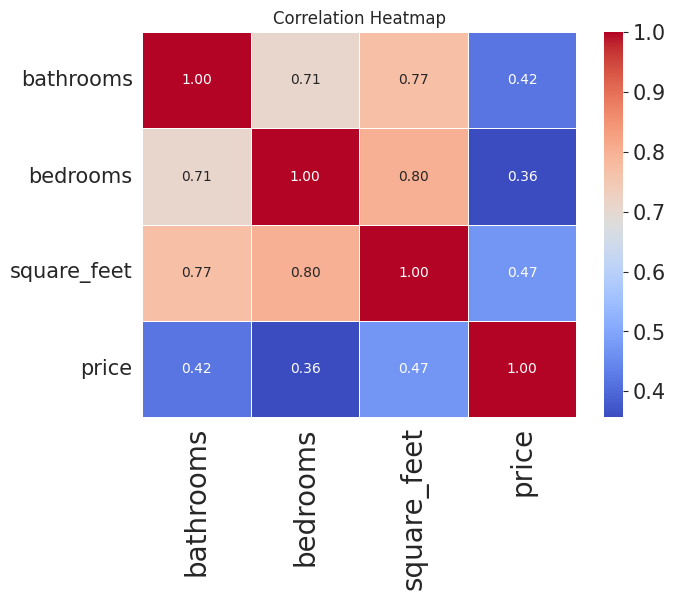

In [ ]:
# Calculating the correlation matrix
corr_matrix = final_df_without_cityname[['bathrooms', 'bedrooms', 'square_feet', 'price']].corr()

# Creating a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
s_columns = ['bathrooms', 'bedrooms', 'square_feet']

# Create a new DataFrame with only the selected columns
features = final_df_without_cityname.drop('price',axis='columns')
target = final_df_without_cityname['price']

In [ ]:
# Convert column names to string type
features.columns = features.columns.astype(str)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=13)

# Initializing and fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


# Calculate RMSE for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)

R-squared score on training set: 0.9078211972590337
R-squared score on test set: 0.9097638903104992
RMSE on training set: 0.12227201719330219
RMSE on test set: 0.11969942240962711


In [ ]:
# Convert column names to string type
features.columns = features.columns.astype(str)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=13)

# Initializing and fitting the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=13)
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)

R-squared score on training set: 1.0
R-squared score on test set: 0.9946211705656828
RMSE on training set: 9.754062519792742e-17
RMSE on test set: 0.029224410492122953


In [ ]:
# Printing model depth
print(model.get_depth())

20


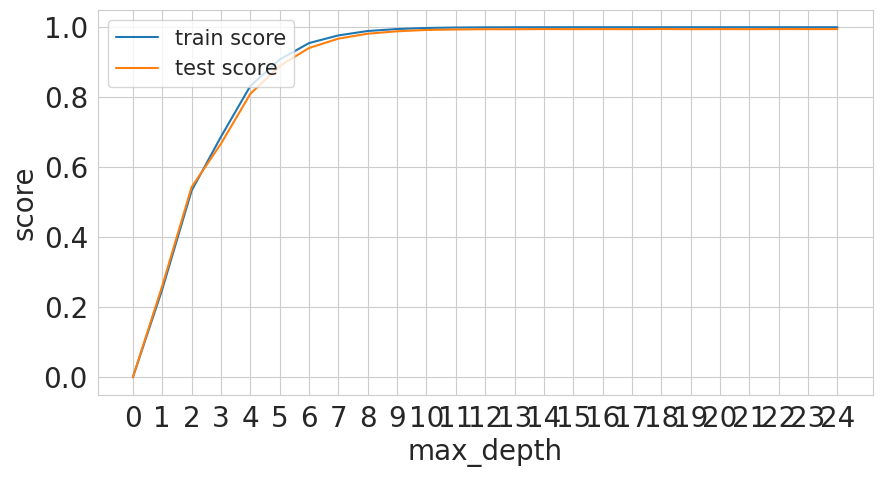

In [ ]:
# Initializing lists to store training and testing scores
score_train_list = [0]
score_test_list = [0]

# Looping through different depths for Decision Tree Regressor
for depth in range(1, 25):
    # Initializing and fitting the Decision Tree Regressor model with specified maximum depth
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)

    # Predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating scores for training and testing sets
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    # Appending scores to respective lists
    score_train_list.append(score_train)
    score_test_list.append(score_test)

# Setting font sizes for x and y ticks
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# Creating a plot
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(score_train_list, label="train score")
plt.plot(score_test_list, label="test score")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 25, 1))
plt.xlabel("max_depth", size=20)
plt.ylabel("score", size=20)
plt.show()

In [ ]:
# Initializing Decision Tree Regressor model with specified maximum depth and random state
model = DecisionTreeRegressor(max_depth=17, random_state=13)

# Fitting the model with training data
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)

R-squared score on training set: 0.9999994117423419
R-squared score on test set: 0.9950473885892619
RMSE on training set: 0.0003088839485709938
RMSE on test set: 0.028042646669430335


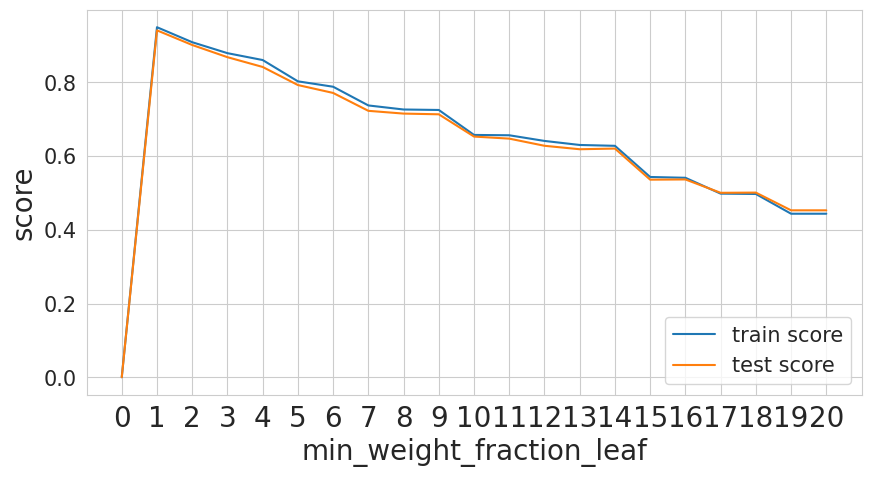

In [ ]:
# Initializing lists to store training and testing scores
score_train_list = [0]
score_test_list = [0]

# Setting maximum value for min_weight_fraction_leaf
max_y = 20

# Looping through different values for min_weight_fraction_leaf
for min_leaf in range(1, max_y+1):
    # Initializing and fitting the Decision Tree Regressor model with specified minimum weight fraction leaf and random state
    model = DecisionTreeRegressor(min_weight_fraction_leaf=min_leaf/100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating scores for training and testing sets
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    # Appending scores to respective lists
    score_train_list.append(score_train)
    score_test_list.append(score_test)

# Setting font sizes for x and y ticks
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=15)

# Creating a plot
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(score_train_list, label="train score")
plt.plot(score_test_list, label="test score")
plt.legend(loc="lower right", prop={'size': 15})
plt.xticks(range(0, max_y+1, 1))
plt.xlabel("min_weight_fraction_leaf", size=20)
plt.ylabel("score", size=20)
plt.show()

In [ ]:
# Initializing Decision Tree Regressor model with specified maximum depth, minimum weight fraction leaf, and random state
# Note: Higher values for min_weight_fraction_leaf indicate worse splits
model = DecisionTreeRegressor(max_depth=17, min_weight_fraction_leaf=0.00017, random_state=13)

# Fitting the model with training data
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)

R-squared score on training set: 0.9999994117423419
R-squared score on test set: 0.9950473885892619
RMSE on training set: 0.0003088839485709938
RMSE on test set: 0.028042646669430335


In [ ]:
# Initializing Decision Tree Regressor model with specified maximum depth, minimum weight fraction leaf, and random state
# Note: Higher values for min_weight_fraction_leaf indicate worse splits
model = DecisionTreeRegressor(max_depth=17, min_weight_fraction_leaf=0.00017, random_state=13)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print R-squared and RMSE scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)


R-squared score on training set: 0.9999994117423419
R-squared score on test set: 0.9950473885892619
RMSE on training set: 0.0003088839485709938
RMSE on test set: 0.028042646669430335


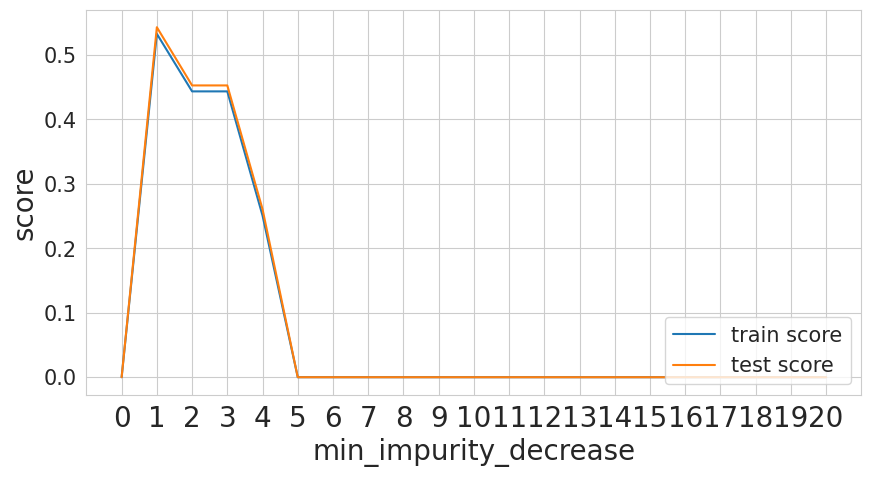

In [ ]:
# Initializing lists to store training and testing scores
score_train_list = [0]
score_test_list = [0]

# Setting maximum value for min_impurity_decrease
max_y = 20

# Looping through different values for min_impurity_decrease
for depth in range(1, max_y+1):
    # Initializing and fitting the Decision Tree Regressor model with specified min_impurity_decrease and random state
    model = DecisionTreeRegressor(min_impurity_decrease=depth/100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculating scores for training and testing sets
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    # Appending scores to respective lists
    score_train_list.append(score_train)
    score_test_list.append(score_test)

# Setting font sizes for x and y ticks
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=15)

# Creating a plot
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(score_train_list, label="train score")
plt.plot(score_test_list, label="test score")
plt.legend(loc="lower right", prop={'size': 15})
plt.xticks(range(0, max_y+1, 1))
plt.xlabel("min_impurity_decrease", size=20)
plt.ylabel("score", size=20)
plt.show()

In [ ]:
# Initializing Decision Tree Regressor model with specified maximum depth, minimum weight fraction leaf, and random state
model = DecisionTreeRegressor(max_depth=17, min_weight_fraction_leaf=0.00017, random_state=13)

# Fitting the model with training data
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)

R-squared score on training set: 0.9999994117423419
R-squared score on test set: 0.9950473885892619
RMSE on training set: 0.0003088839485709938
RMSE on test set: 0.028042646669430335


In [ ]:
# Initializing RandomForestRegressor model with specified parameters
# Note: max_depth, min_weight_fraction_leaf, max_samples, and n_estimators are hyperparameters
model = RandomForestRegressor(max_depth=17, min_weight_fraction_leaf=0.00017, random_state=13, max_samples=1110, n_estimators=56)

# Fitting the model with training data
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)


R-squared score on training set: 0.996703371368536
R-squared score on test set: 0.9950321621525392
RMSE on training set: 0.0003088839485709938
RMSE on test set: 0.028085721106957586


In [ ]:
# Initializing RandomForestRegressor model with specified parameters
# Note: max_depth, min_weight_fraction_leaf, and random_state are hyperparameters
model = RandomForestRegressor(max_depth=17, min_weight_fraction_leaf=0.00017, random_state=13)

# Fitting the model with training data
model.fit(X_train, y_train)

# Predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating R-squared scores for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate RMSE for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


# Printing R-squared scores
print("R-squared score on training set:", train_r2)
print("R-squared score on test set:", test_r2)
print("RMSE on training set:", train_rmse)
print("RMSE on test set:", test_rmse)

R-squared score on training set: 0.9996782556759326
R-squared score on test set: 0.9977500470082608
RMSE on training set: 0.0003088839485709938
RMSE on test set: 0.018901165954927347


**Conclusion:** In this project, we cleaned and prepared a dataset on apartment listings for analysis, handling missing data and outliers to improve our data quality. We then focused on feature engineering, like turning city names into a format suitable for machine learning models.

We applied Linear Regression and Decision Tree Regressor models to predict apartment prices. The Linear Regression model showed strong predictive accuracy, indicating it captured the relationship between features and prices well. The Decision Tree Regressor was adjusted for better performance by tuning its depth and other parameters, which helped in avoiding overfitting and ensured the model worked well on both training and unseen data.

Experimentation with the Decision Tree model highlighted the balance needed between making the model complex enough to learn from the data but simple enough to generalize to new data. This was seen when we adjusted the `min_impurity_decrease` parameter, learning that too high a value could lead to oversimplification.

Overall, the project emphasized the importance of careful data preparation and model parameter tuning in achieving accurate predictions. It showed that with the right approach, machine learning can provide valuable insights into real estate pricing.